# Import the necessary libraries:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset into a Pandas DataFrame:

In [4]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

In [5]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
data['phone number'] = data['phone number'].str[:3]

In [7]:
data = data.drop(columns='phone number')

In [8]:
print(data.columns)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


In [9]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Extract the features (X) and the target variable (y):

In [10]:
X = data.drop("churn", axis=1)
y = data["churn"]

# Perform one-hot encoding on categorical features if needed:

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [12]:
X_encoded

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,1
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,0,0,1,0,0,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0,0,0,0,0,0,0,0,1,0


In [13]:
print(X_encoded.columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_

In [ ]:
import pandas as pd
from itertools import combinations

data = pd.read_csv("Raw_Data/Churn_Data.csv")
data = data.drop(columns='phone number')
print(data.columns)

X = data.drop("churn", axis=1)
y = data["churn"]

X_encoded = pd.get_dummies(X, drop_first=True)

# Generate all combinations of the original features
all_combinations = []
for r in range(1, len(X_encoded.columns) + 1):
    combinations_r = combinations(X_encoded.columns, r)
    all_combinations.extend(combinations_r)

# Iterate over each combination
for feature_combination in all_combinations:
    # Convert the feature combination to a list
    feature_combination = list(feature_combination)

    X_selected = X_encoded[feature_combination]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    smote = SMOTE()
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train_oversampled, y_train_oversampled)

    y_pred = logreg.predict(X_test)

    print(f"Feature Combination: {feature_combination}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")

    # Calculate the correlation between the features and the target variable 'churn'
    correlations = X_selected.apply(lambda feature: feature.corr(y))

    print("Correlations:")
    print(correlations)
    print("--------------------------------------------")

In [49]:
# Generate all combinations of the original features
all_combinations = []
for r in range(1, len(X_encoded) + 1):
    combinations_r = combinations(X_encoded, r)
    all_combinations.extend(combinations_r)

# Iterate over each combination
for feature_combination in all_combinations:
    # Convert the feature combination to a list
    feature_combination = list(feature_combination)

NameError: name 'combinations' is not defined

# Split the dataset into training and testing sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model:

In [15]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# Make predictions on the test set:

In [16]:
y_pred = logreg.predict(X_test)

# Evaluate the model's performance:

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.52      0.15      0.23       101

    accuracy                           0.85       667
   macro avg       0.69      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667



- This will display a classification report showing various metrics such as precision, recall, and F1-score for each class (churned and non-churned).

- Remember to ensure that you have the necessary libraries installed before running the code.

# Apply SMOTE to oversample the minority class (churned):

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create and train the logistic regression model on the oversampled data:

In [19]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(solver='liblinear')

# Make predictions on the test set:

In [20]:
y_pred = logreg.predict(X_test)

# Evaluate the model's performance:

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91       566
        True       0.48      0.27      0.34       101

    accuracy                           0.85       667
   macro avg       0.68      0.61      0.63       667
weighted avg       0.82      0.85      0.83       667



In [22]:
X_train_oversampled

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,243,510,0,95.500000,92,16.240000,163.700000,63,13.910000,264.200000,...,0,1,0,0,0,0,0,0,0,0
1,108,415,0,112.000000,105,19.040000,193.700000,110,16.460000,208.900000,...,0,0,0,0,0,0,0,0,0,0
2,75,415,0,222.400000,78,37.810000,327.000000,111,27.800000,208.000000,...,1,0,0,0,0,0,0,0,1,0
3,141,415,0,126.900000,98,21.570000,180.000000,62,15.300000,140.800000,...,0,0,0,0,0,0,0,0,0,0
4,86,510,0,216.300000,96,36.770000,266.300000,77,22.640000,214.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,61,415,0,255.563559,117,43.446198,214.229752,123,18.208010,246.870769,...,0,0,0,0,0,0,0,0,0,0
4564,60,510,21,142.512330,123,24.229540,203.543952,107,17.301070,146.864979,...,0,0,0,0,0,0,0,0,0,0
4565,142,411,0,148.366697,70,25.220585,178.736227,143,15.192608,172.294206,...,0,0,0,0,0,0,0,0,0,0
4566,106,415,0,279.027945,120,47.434739,293.350238,101,24.936035,205.516587,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(X_train_oversampled.columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_

In [24]:

# Get the feature coefficients
coefficients = logreg.coef_[0]

# Create a DataFrame to store the feature names and corresponding coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients by magnitude (absolute value)
feature_coefficients['Abs_Coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients = feature_coefficients.sort_values('Abs_Coefficient', ascending=False)

# Print the feature coefficients
print(feature_coefficients)

                Feature  Coefficient  Abs_Coefficient
43             state_ND    -3.965177         3.965177
61             state_VT    -3.964749         3.964749
16             state_AL    -3.774202         3.774202
60             state_VA    -3.744896         3.744896
29             state_IL    -3.629029         3.629029
..                  ...          ...              ...
9   total night minutes     0.001073         0.001073
1             area code     0.000749         0.000749
0        account length     0.000633         0.000633
4       total day calls    -0.000604         0.000604
7       total eve calls     0.000346         0.000346

[68 rows x 3 columns]


In [25]:
# Sort the coefficients by magnitude (absolute value) in descending order
feature_coefficients = feature_coefficients.sort_values('Abs_Coefficient', ascending=False)

# Print the feature coefficients
print(feature_coefficients)

                Feature  Coefficient  Abs_Coefficient
43             state_ND    -3.965177         3.965177
61             state_VT    -3.964749         3.964749
16             state_AL    -3.774202         3.774202
60             state_VA    -3.744896         3.744896
29             state_IL    -3.629029         3.629029
..                  ...          ...              ...
9   total night minutes     0.001073         0.001073
1             area code     0.000749         0.000749
0        account length     0.000633         0.000633
4       total day calls    -0.000604         0.000604
7       total eve calls     0.000346         0.000346

[68 rows x 3 columns]


In [26]:
feature_coefficients.to_excel('Testing_Outputs/feature_coefficients.xlsx', index=False)

In [27]:
import statsmodels.api as sm

# Fit the logistic regression model
logreg = sm.Logit(y_train, sm.add_constant(X_train))
result = logreg.fit()

# Perform significance testing
p_values = result.pvalues[1:]  # Exclude the intercept

# Print the feature names and their corresponding p-values
p_values_df = pd.DataFrame({'Feature': X_train.columns, 'p-value': p_values})
print(p_values_df)

Optimization terminated successfully.
         Current function value: 0.309034
         Iterations 8
                                       Feature       p-value
account length                  account length  6.187494e-01
area code                            area code  1.755716e-01
number vmail messages    number vmail messages  2.612198e-01
total day minutes            total day minutes  5.567656e-01
total day calls                total day calls  9.992125e-01
...                                        ...           ...
state_WI                              state_WI  5.716562e-01
state_WV                              state_WV  4.634810e-01
state_WY                              state_WY  6.569359e-01
international plan_yes  international plan_yes  1.120443e-38
voice mail plan_yes        voice mail plan_yes  1.132220e-02

[68 rows x 2 columns]


In [28]:
p_values_df

,Feature,p-value
account length,account length,6.187494e-01
area code,area code,1.755716e-01
number vmail messages,number vmail messages,2.612198e-01
total day minutes,total day minutes,5.567656e-01
total day calls,total day calls,9.992125e-01
...,...,...
state_WI,state_WI,5.716562e-01
state_WV,state_WV,4.634810e-01
state_WY,state_WY,6.569359e-01
international plan_yes,international plan_yes,1.120443e-38


In [29]:
p_values_df.to_excel('Testing_Outputs/p_values_df.xlsx', index=False)

In [30]:
data 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [31]:
data_cleaned = data.drop([ 'total day calls', 'total night charge', 'total night minutes', 'total eve calls', 'total night calls', 'account length', 'total day minutes', 'total day charge', 'total intl minutes', 'total eve charge', 'total intl charge', 'total eve minutes', 'number vmail messages'
], axis=1)

In [32]:
X_cleaned = data_cleaned.drop("churn", axis=1)
y_cleaned = data_cleaned["churn"]

In [33]:
X_encoded = pd.get_dummies(X_cleaned, drop_first=True)

In [34]:
X_encoded = pd.get_dummies(X_encoded, columns=['area code'], drop_first=True)

In [35]:
X_encoded

,total intl calls,customer service calls,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,6,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3329,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3330,6,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3331,10,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_cleaned, test_size=0.2, random_state=42)

In [37]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_pred = logreg.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.98      0.92       566
        True       0.48      0.12      0.19       101

    accuracy                           0.85       667
   macro avg       0.67      0.55      0.55       667
weighted avg       0.80      0.85      0.81       667



In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [41]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(solver='liblinear')

In [42]:
y_pred = logreg.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.93      0.90       566
        True       0.41      0.28      0.33       101

    accuracy                           0.83       667
   macro avg       0.64      0.60      0.62       667
weighted avg       0.81      0.83      0.82       667



In [44]:
X_train_oversampled.columns

Index(['total intl calls', 'customer service calls', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'international plan_yes', 'voice mail plan_yes', 'area code_415',
       'area code_510'],
      dtype='object')

In [45]:
X_train_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   total intl calls        4568 non-null   int64
 1   customer service calls  4568 non-null   int64
 2   state_AL                4568 non-null   uint8
 3   state_AR                4568 non-null   uint8
 4   state_AZ                4568 non-null   uint8
 5   state_CA                4568 non-null   uint8
 6   state_CO                4568 non-null   uint8
 7   state_CT                4568 non-null   uint8
 8   state_DC                4568 non-null   uint8
 9   state_DE                4568 non-null   uint8
 10  state_FL                4568 non-null   uint8
 11  state_GA                4568 non-null   uint8
 12  state_HI                4568 non-null   uint8
 13  state_IA                4568 non-null   uint8
 14  state_ID                4568 non-null   uint8
 15  state_IL             

In [46]:
# Fit the logistic regression model
logreg = sm.Logit(y_train_oversampled, sm.add_constant(X_train_oversampled))
result = logreg.fit()

# Perform significance testing
p_values = result.pvalues[1:]  # Exclude the intercept

# Create a DataFrame for feature names and p-values
p_values_df = pd.DataFrame({'Feature': X_train_oversampled.columns, 'p-value': p_values})

# Print the feature names and their corresponding p-values
print(p_values_df)

Optimization terminated successfully.
         Current function value: 0.309235
         Iterations 8
                                       Feature       p-value
total intl calls              total intl calls  3.171464e-09
customer service calls  customer service calls  7.127457e-29
state_AL                              state_AL  8.800949e-34
state_AR                              state_AR  3.654424e-33
state_AZ                              state_AZ  6.832869e-24
state_CA                              state_CA  2.983206e-20
state_CO                              state_CO  5.403977e-44
state_CT                              state_CT  1.440769e-41
state_DC                              state_DC  2.616835e-29
state_DE                              state_DE  3.131477e-34
state_FL                              state_FL  2.707634e-31
state_GA                              state_GA  5.875129e-32
state_HI                              state_HI  8.516939e-22
state_IA                              state_

In [47]:
p_values_df.to_excel('p_values_df.xlsx', index=False)

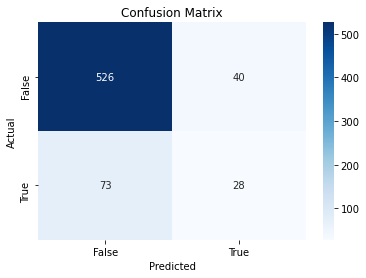

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your predicted labels in y_pred and true labels in y_test
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()